# Exploratory Data Analysis On IPL 2022 Dataset

### Loading the Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv( 'IPL.csv')

df.head()



,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [3]:
df.shape

(74, 20)

Now let's see how many columns have null values in total.

In [4]:
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

1. Which team won the most matches?

Text(0.5, 1.0, 'Most Won Matches')

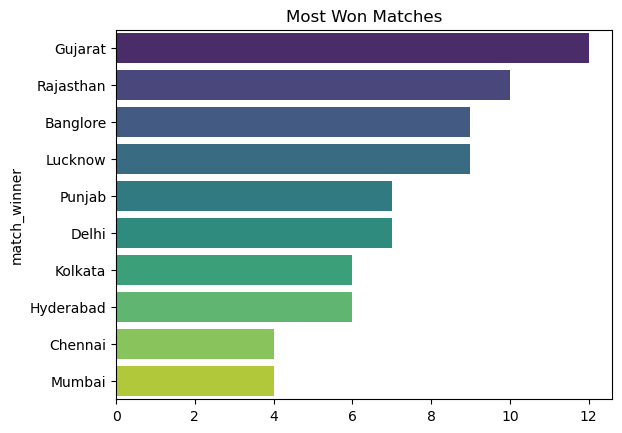

In [5]:
won_most_matches = df["match_winner"].value_counts().sort_values(ascending=False)
sns.barplot(y=won_most_matches.index , x=won_most_matches.values, palette="viridis")
plt.title("Most Won Matches")

2. Toss Decision (Fielding/Batting)

Text(0.5, 1.0, 'Toss Decision')

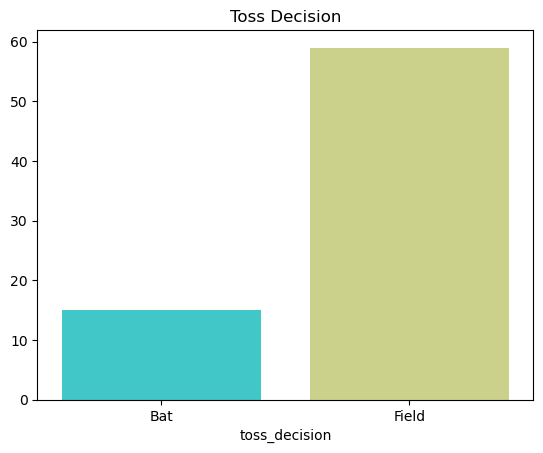

In [6]:
toss_decision = df.groupby("toss_decision").count()["match_id"]
sns.barplot(x = toss_decision.index , y= toss_decision.values, palette="rainbow")
plt.title("Toss Decision")

3. Toss Winner vs Match Winner

In [7]:
toss_winner = df[df['toss_winner'] == df["match_winner"]]["match_id"].count()
percentage = (toss_winner *100)/df.shape[0]
percentage.round(2)
# Returns the percentage value where team has won the toss as well as the match.

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won By')

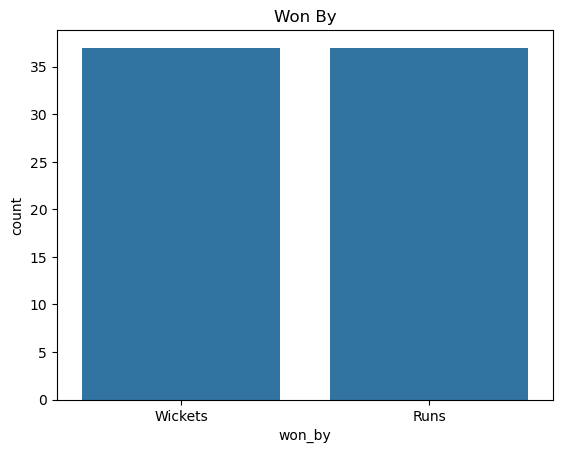

In [8]:
sns.countplot(x = df["won_by"])
plt.title("Won By")

###  Key Player Performances

1) Most "Player of the Match" Awards

Text(0.5, 1.0, 'Player of the Match Award')

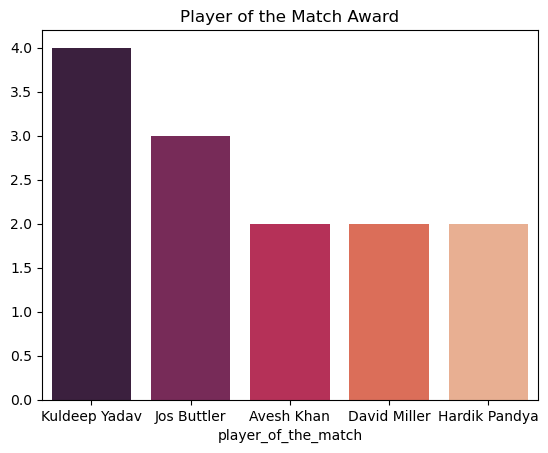

In [9]:
award_player = df.groupby("player_of_the_match")["match_id"].count().sort_values(ascending=False)
sns.barplot(y = award_player.head().values , x=award_player.head().index, palette="rocket")
plt.title("Player of the Match Award")

2 Top Scorers

Text(0.5, 1.0, 'Top 2 Scorers')

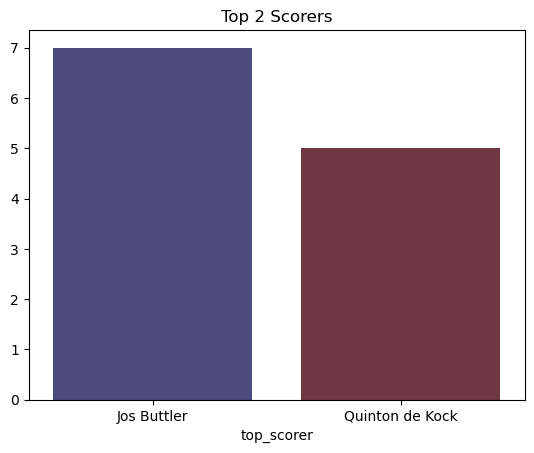

In [10]:
top_scorer = df.groupby("top_scorer")["match_id"].count().sort_values(ascending=False)
top_scorer.head(2)
sns.barplot(x= top_scorer.head(2).index , y = top_scorer.head(2).values, palette="icefire")
plt.title("Top 2 Scorers")

10 Best Bowling Figures

Text(0.5, 1.0, 'Top 10 Bowling Figures')

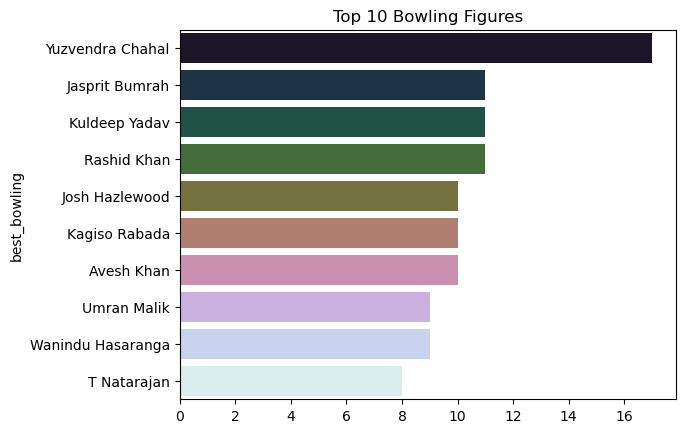

In [11]:
df["wickets"] = df["best_bowling_figure"].apply(lambda x: x.split("--")[0])
df["wickets"] = df["wickets"].astype(int)
bowling_figures = df.groupby("best_bowling")["wickets"].sum().sort_values(ascending=False).head(10)
sns.barplot(y = bowling_figures.index , x=bowling_figures.values , palette="cubehelix")
plt.title("Top 10 Bowling Figures")

###  Venue Analysis

Most Matches Played by Venue

Text(0.5, 1.0, 'Most Matches Played by Venue ')

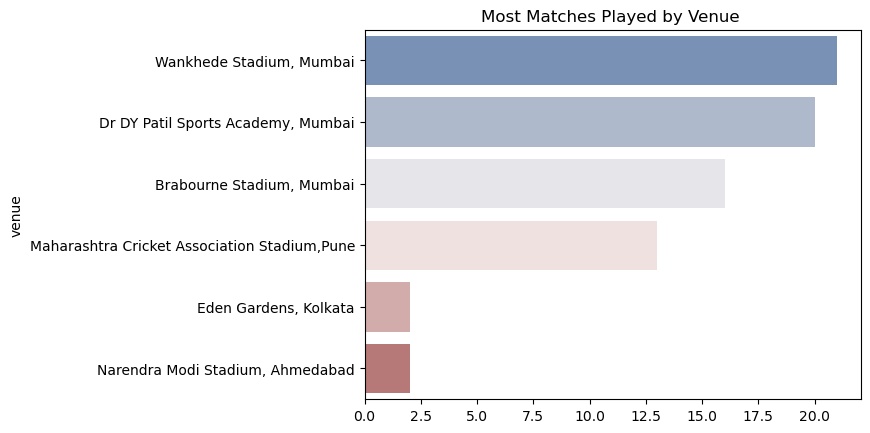

In [12]:
Venue = df.groupby("venue")["match_id"].count().sort_values(ascending=False)
sns.barplot(x = Venue.values , y= Venue.index , palette="vlag")
plt.title("Most Matches Played by Venue ")

### Additional Questions & Insights
Q1: Who won the highest margin by runs?

In [13]:
df[df["won_by"]== "Runs"].sort_values(by = "margin",ascending=False).head(1)[["match_winner","margin"]]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [14]:
df[["top_scorer","highscore"]].sort_values(by = "highscore",ascending=False).head(1)

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [15]:
df[df["best_bowling_figure"] == df["best_bowling_figure"].max()]["best_bowling"]

29    Yuzvendra Chahal
Name: best_bowling, dtype: object

### DONE